<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.2_descriptives/stats_descriptives_dispersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: Descriptive statistics
# Computing dispersion

In [12]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

Mean: 3.3333333333333335
Variance (σ^2): 0.5555555555555555
Sample Variance: 0.6666666666666666
Standard deviation is 0.7453559924999298
Standard deviation(sqrt): 0.7453559924999298


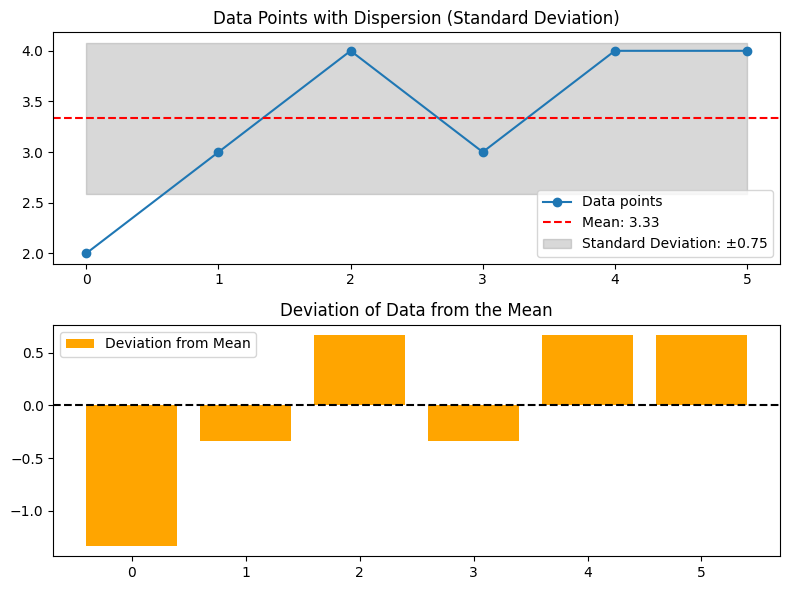

In [19]:
# x = [8, 0, 4, 1, -2, 7]
x = [2,3,4,3,4,4]

# Calculate and print the mean
mean_x = np.mean(x)
print("Mean:", mean_x)

# Calculate and print the population variance (dispersion or sigma^2)
# NumPy use the population variance formula by default, dividing by 𝑛.
variance_x = np.var(x)
print("Variance (σ^2):", variance_x)

# Calculate and print the sample variance (with ddof=1)
# ddof=1 tells NumPy to use the sample variance formula, dividing by 𝑛−1.
variance_sample_x = np.var(x, ddof=1)
print("Sample Variance:", variance_sample_x)

std_dev_x = np.sqrt(variance_x)  # Standard deviation (sqrt of variance)
print(f'Standard deviation is {std_dev_x}')
print(f'Standard deviation(sqrt): {np.sqrt(variance_x)}')

# plotting
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

# Plotting the raw data points and mean line
ax[0].plot(x, 'o-', label='Data points')
ax[0].axhline(mean_x, color='r', linestyle='--', label=f'Mean: {mean_x:.2f}')
ax[0].fill_between(range(len(x)), mean_x - std_dev_x, mean_x + std_dev_x, color='gray', alpha=0.3, label=f'Standard Deviation: ±{std_dev_x:.2f}')
ax[0].set_title('Data Points with Dispersion (Standard Deviation)')
ax[0].legend()

# Visualizing the "dispersion" (difference of each point from the mean)
deviations = np.array(x) - mean_x
ax[1].bar(range(len(x)), deviations, color='orange', label='Deviation from Mean')
ax[1].axhline(0, color='k', linestyle='--')  # Line for zero deviation
ax[1].set_title('Deviation of Data from the Mean')
ax[1].legend()

plt.tight_layout()
plt.show()


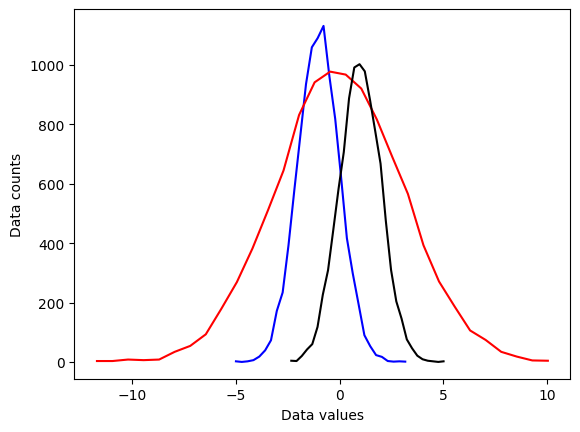

In [20]:
## create some data distributions

# the distributions
N = 10001   # number of data points
nbins = 30  # number of histogram bins

d1 = np.random.randn(N) - 1
d2 = 3*np.random.randn(N)
d3 = np.random.randn(N) + 1

# need their histograms
y1,x1 = np.histogram(d1,nbins)
x1 = (x1[1:]+x1[:-1])/2

y2,x2 = np.histogram(d2,nbins)
x2 = (x2[1:]+x2[:-1])/2

y3,x3 = np.histogram(d3,nbins)
x3 = (x3[1:]+x3[:-1])/2


# plot them
plt.plot(x1,y1,'b')
plt.plot(x2,y2,'r')
plt.plot(x3,y3,'k')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

In [21]:
# side note:

meanval = 10.2
stdval  = 7.5
numsamp = 123

# this
np.random.normal(meanval,stdval,numsamp)

# is equivalent to
np.random.randn(numsamp)*stdval + meanval

array([ 17.41226402,   4.30195277,  15.01011661,  11.34507187,
         6.99496881,  -2.7892491 ,  10.33297125,   8.59780449,
         3.25301943,   7.72978628,  25.75750775,  13.99248559,
        24.38587073,  18.96213465,  11.86383621,  15.91472348,
        10.35323827,   8.12860345,  15.99791606,  23.67863894,
        16.66100181,   9.88972797,  15.86670186,  20.25098145,
        10.56254194,  13.43796943,  26.64912411,   8.3793111 ,
         9.52345152,  18.21978024,   8.90810786,   4.90152576,
         4.66289562,  -5.8561599 ,  15.7593367 ,   8.10958518,
        13.45274443,   5.3157001 ,   5.32365764,  21.60056048,
         9.14377286,   2.87340898,   3.17988711,  20.00475051,
         3.62280427,  18.28415985,   1.85108446,  10.35704814,
        13.06077969,   1.71273925,  14.11352482,   7.24667954,
         8.1517345 ,   6.66157735,   7.03052647,   8.86060749,
         1.88985088,  -5.90877434, -10.97940453,  -3.33522544,
         9.316468  ,   3.30425067,  12.89127186,   7.03

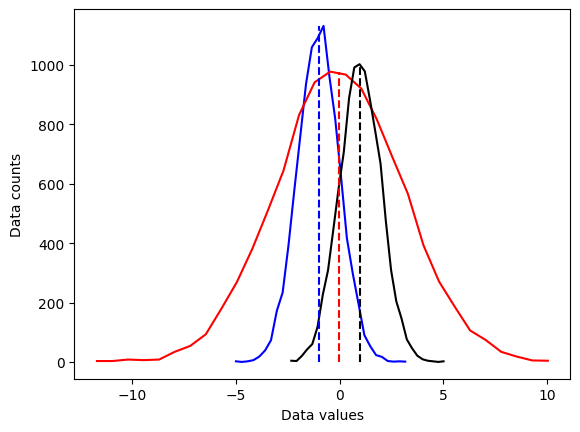

In [22]:
## overlay the mean

# compute the means
mean_d1 = sum(d1) / len(d1)
mean_d2 = np.mean(d2)
mean_d3 = np.mean(d3)

# plot them
plt.plot(x1,y1,'b', x2,y2,'r', x3,y3,'k')
plt.plot([mean_d1,mean_d1],[0,max(y1)],'b--')
plt.plot([mean_d2,mean_d2],[0,max(y2)],'r--')
plt.plot([mean_d3,mean_d3],[0,max(y3)],'k--')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

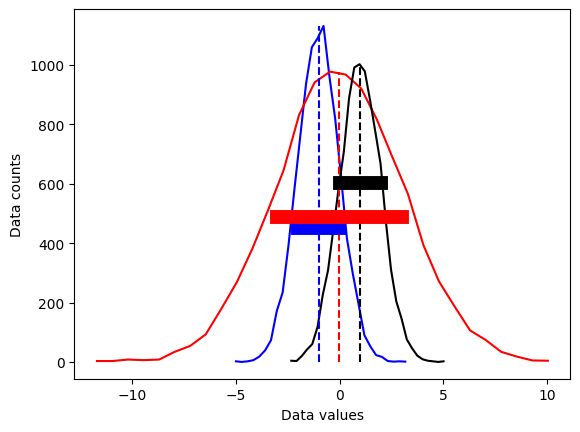

In [23]:
## now for the standard deviation

# initialize
stds = np.zeros(3)

# compute standard deviations
stds[0] = np.std(d1,ddof=1)
stds[1] = np.std(d2,ddof=1)
stds[2] = np.std(d3,ddof=1)


# same plot as earlier
plt.plot(x1,y1,'b', x2,y2,'r', x3,y3,'k')
plt.plot([mean_d1,mean_d1],[0,max(y1)],'b--', [mean_d2,mean_d2],[0,max(y2)],'r--',[mean_d3,mean_d3],[0,max(y3)],'k--')

# now add stds
plt.plot([mean_d1-stds[0],mean_d1+stds[0]],[.4*max(y1),.4*max(y1)],'b',linewidth=10)
plt.plot([mean_d2-stds[1],mean_d2+stds[1]],[.5*max(y2),.5*max(y2)],'r',linewidth=10)
plt.plot([mean_d3-stds[2],mean_d3+stds[2]],[.6*max(y3),.6*max(y3)],'k',linewidth=10)

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

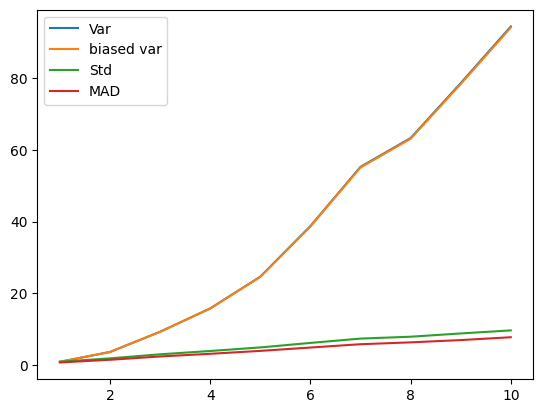

In [8]:
## different variance measures

variances = np.arange(1,11)
N = 300

varmeasures = np.zeros((4,len(variances)))

for i in range(len(variances)):

    # create data and mean-center
    data = np.random.randn(N) * variances[i]
    datacent = data - np.mean(data)

    # variance
    varmeasures[0,i] = sum(datacent**2) / (N-1)

    # "biased" variance
    varmeasures[1,i] = sum(datacent**2) / N

    # standard deviation
    varmeasures[2,i] = np.sqrt( sum(datacent**2) / (N-1) )

    # MAD (mean absolute difference)
    varmeasures[3,i] = sum(abs(datacent)) / (N-1)


# show them!
plt.plot(variances,varmeasures.T)
plt.legend(('Var','biased var','Std','MAD'))
plt.show()

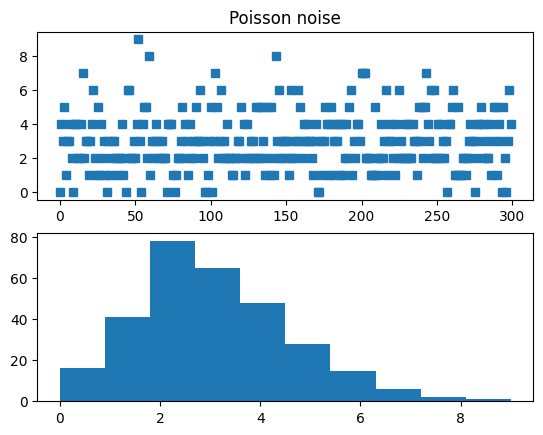

In [9]:
## Fano factor and coefficient of variation (CV)

# need positive-valued data (why?)
data = np.random.poisson(3,300)  # "Poisson noise"

fig,ax = plt.subplots(2,1)
ax[0].plot(data,'s')
ax[0].set_title('Poisson noise')

ax[1].hist(data)
plt.show()

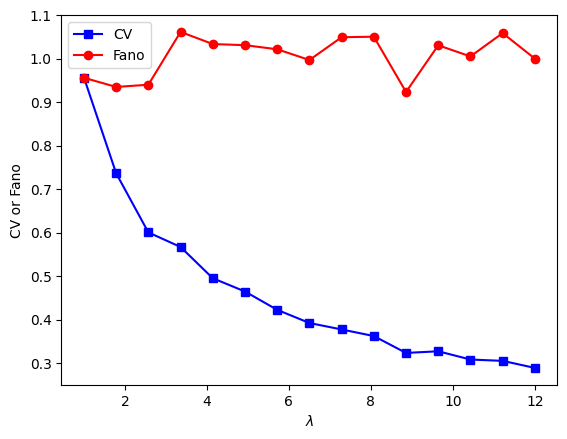

In [10]:
## compute fano factor and CV for a range of lambda parameters

# list of parameters
lambdas = np.linspace(1,12,15)

# initialize output vectors
fano = np.zeros(len(lambdas))
cv   = np.zeros(len(lambdas))

for li in range(len(lambdas)):

    # generate new data
    data = np.random.poisson(lambdas[li],1000)

    # compute the metrics
    cv[li]   = np.std(data) / np.mean(data) # need ddof=1 here?
    fano[li] = np.var(data) / np.mean(data)


# and plot
plt.plot(lambdas,cv,'bs-')
plt.plot(lambdas,fano,'ro-')
plt.legend(('CV','Fano'))
plt.xlabel('$\lambda$')
plt.ylabel('CV or Fano')
plt.show()